<a href="https://colab.research.google.com/github/CorkCork/NYPD-Motor-Vehicle-Collisions/blob/master/Copy_of_MotorVehicleData1105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
mv_data = pd.read_csv('https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=50000')   

### We import the data set from NYPD motor vehicle crash and limit 50,000 rows. This will allow us to work with some of the dataset and look at crashes involving driver inexperience in the borough of Brooklyn.


### Next, look at the number of rows and columns in the data set imported using shape command

In [0]:
mv_data.shape


(50000, 29)

### We have 50,000 rows and 29 columns of data in the information imported. Let's put it into an array with headers for each column

In [0]:
mv_data.head()

NameError: ignored

In [0]:
mv_data['borough'].head(50)

0        QUEENS
1      BROOKLYN
2        QUEENS
3           NaN
4        QUEENS
5           NaN
6           NaN
7        QUEENS
8     MANHATTAN
9        QUEENS
10       QUEENS
11       QUEENS
12          NaN
13     BROOKLYN
14       QUEENS
15        BRONX
16          NaN
17          NaN
18     BROOKLYN
19       QUEENS
20     BROOKLYN
21     BROOKLYN
22     BROOKLYN
23       QUEENS
24     BROOKLYN
25       QUEENS
26        BRONX
27          NaN
28       QUEENS
29     BROOKLYN
30        BRONX
31       QUEENS
32     BROOKLYN
33          NaN
34          NaN
35          NaN
36          NaN
37     BROOKLYN
38        BRONX
39     BROOKLYN
40     BROOKLYN
41          NaN
42        BRONX
43          NaN
44     BROOKLYN
45     BROOKLYN
46    MANHATTAN
47          NaN
48    MANHATTAN
49       QUEENS
Name: borough, dtype: object

#### Now we can find the unique types of vehicles involved in these crashes. Let's look at vehcile number one, the first vehicle impacting. This column value is vehicle_type_code1.

In [0]:
mv_data['vehicle_type_code1'].head(15)

0                                    Dump
1     Station Wagon/Sport Utility Vehicle
2                                   Sedan
3                                   Sedan
4     Station Wagon/Sport Utility Vehicle
5     Station Wagon/Sport Utility Vehicle
6                                   Sedan
7                                   Sedan
8                                   Sedan
9                                   Sedan
10    Station Wagon/Sport Utility Vehicle
11                                  Sedan
12                                    Bus
13    Station Wagon/Sport Utility Vehicle
14    Station Wagon/Sport Utility Vehicle
Name: vehicle_type_code1, dtype: object

In [0]:
top_boroughs = mv_data['borough'].value_counts()

NameError: ignored

In [0]:

top_vehicles = mv_data['vehicle_type_code1'].value_counts()

In [0]:
top_vehicles.head(20)

Sedan                                  22535
Station Wagon/Sport Utility Vehicle    18723
Taxi                                    2468
Pick-up Truck                           1484
Box Truck                                955
Bus                                      906
Tractor Truck Diesel                     422
Bike                                     300
Van                                      282
Motorcycle                               179
Dump                                     138
Convertible                              134
Ambulance                                113
Garbage or Refuse                        113
Flat Bed                                 108
PK                                        70
Carry All                                 69
Tractor Truck Gasoline                    52
Tow Truck / Wrecker                       49
Tanker                                    41
Name: vehicle_type_code1, dtype: int64

In [0]:
top_boroughs.head(20)

BROOKLYN         10318
QUEENS            9223
MANHATTAN         6186
BRONX             5312
STATEN ISLAND     1026
Name: borough, dtype: int64

In [0]:
look_mv_data = mv_data.loc[:, ['borough', 'contributing_factor_vehicle_1']]

In [0]:
look_mv_data.head(60)

,borough,contributing_factor_vehicle_1
0,NaN,Failure to Yield Right-of-Way
1,QUEENS,Unspecified
2,NaN,Backing Unsafely
3,QUEENS,Failure to Yield Right-of-Way
4,BRONX,Backing Unsafely
5,NaN,Driver Inexperience
6,NaN,Backing Unsafely
7,NaN,Passing or Lane Usage Improper
8,NaN,Other Vehicular
9,NaN,Unspecified


In [0]:
look_mv_data_df = look_mv_data[look_mv_data.borough == 'QUEENS']
look_mv_data_df


,borough,contributing_factor_vehicle_1
1,QUEENS,Unspecified
3,QUEENS,Failure to Yield Right-of-Way
11,QUEENS,Passing Too Closely
12,QUEENS,Driver Inattention/Distraction
13,QUEENS,Unspecified
...,...,...
49985,QUEENS,Driver Inattention/Distraction
49989,QUEENS,Driver Inattention/Distraction
49994,QUEENS,Unspecified
49995,QUEENS,Unsafe Lane Changing


In [0]:
reason_counts = look_mv_data_df['contributing_factor_vehicle_1'].value_counts()
reason_counts

Driver Inattention/Distraction                           2568
Unspecified                                              2025
Failure to Yield Right-of-Way                             900
Backing Unsafely                                          630
Following Too Closely                                     558
Passing Too Closely                                       383
Passing or Lane Usage Improper                            349
Turning Improperly                                        217
Other Vehicular                                           195
Traffic Control Disregarded                               180
Unsafe Lane Changing                                      166
Driver Inexperience                                       140
Reaction to Uninvolved Vehicle                            129
Unsafe Speed                                              109
Alcohol Involvement                                        99
View Obstructed/Limited                                    81
Pedestri

In [0]:
total_reason_counts = reason_counts.sum()
total_reason_counts

9108

In [0]:
Driver_Inattention_Distraction = reason_counts['Driver Inattention/Distraction']
Driver_Inattention_Distraction

2568

In [0]:
reason_counts1 = reason_counts/total_reason_counts*100
reason_counts1

Driver Inattention/Distraction                           28.194993
Unspecified                                              22.233202
Failure to Yield Right-of-Way                             9.881423
Backing Unsafely                                          6.916996
Following Too Closely                                     6.126482
Passing Too Closely                                       4.205094
Passing or Lane Usage Improper                            3.831796
Turning Improperly                                        2.382521
Other Vehicular                                           2.140975
Traffic Control Disregarded                               1.976285
Unsafe Lane Changing                                      1.822574
Driver Inexperience                                       1.537110
Reaction to Uninvolved Vehicle                            1.416337
Unsafe Speed                                              1.196750
Alcohol Involvement                                       1.08

In [0]:
Driver_Inattention_Distraction

In [0]:
look_mv_data.head()

In [0]:
select_mv_data = look_mv_data.iloc[: , [0,1]]
select_mv_data 

,borough,contributing_factor_vehicle_1
0,QUEENS,Passing or Lane Usage Improper
1,BROOKLYN,Passing Too Closely
2,QUEENS,Driver Inexperience
3,NaN,Following Too Closely
4,QUEENS,Driver Inattention/Distraction
...,...,...
49995,NaN,Driver Inattention/Distraction
49996,BROOKLYN,Driver Inattention/Distraction
49997,BROOKLYN,Alcohol Involvement
49998,QUEENS,Unspecified


In [0]:
mv_data['vehicle_type_code1'].unique()

array(['Dump', 'Station Wagon/Sport Utility Vehicle', 'Sedan', 'Bus',
       'Box Truck', 'Pick-up Truck', 'Taxi', 'Van', 'Convertible', nan,
       'Hopper', 'Concrete Mixer', 'Motorcycle', 'fdny', 'Bike',
       'Carry All', 'Garbage or Refuse', 'Ambulance',
       'Tractor Truck Diesel', 'ROAD', 'Motorscooter', 'van', 'PK',
       'AMBU', 'Tanker', 'SPORT UTILITY / STATION WAGON', 'SCHOO',
       'Tractor Truck Gasoline', 'Flat Bed', 'AMBUL', 'Chassis Cab',
       'semi', 'Tow Truck / Wrecker', '3-Door', 'BOX T', 'Moped', 'TANKE',
       'Stree', 'st', 'TRUCK', 'UTILI', 'Vanette', 'FDNY', 'Motorbike',
       'PASSENGER VEHICLE', 'TRACK', 'Trail', 'SCOOT', 'TRACT', 'dumps',
       'picku', 'TAXI', 'Beverage Truck', 'ambul', 'Stake or Rack',
       'Scoot', 'Refrigerated Van', 'Deliv', 'OTHER', 'TOW T',
       'Multi-Wheeled Vehicle', 'garba', 'Flat Rack', 'ELECT',
       'Armored Truck', 'UNKNOWN', 'MAIL', 'RMP', 'tow t', 'FIRE',
       'Livestock Rack', 'TRAIL', 'Box t', 'COMME', 'H

### We can further narrow what we are looking at by selecting for vehicle types. We can look at Station Wagon/Sport Utility Vehicle and Sedan. So, in Brooklyn for inexperienced drivers, what can we see for this group driving Station Wagon/Sport Utility Vehicle versus driving a sedan.

In [0]:
mv_data['vehicle_type_code1'].value_counts()

Sedan                                  22535
Station Wagon/Sport Utility Vehicle    18723
Taxi                                    2468
Pick-up Truck                           1484
Box Truck                                955
                                       ...  
US PO                                      1
none                                       1
C3                                         1
PICK-                                      1
wagon                                      1
Name: vehicle_type_code1, Length: 179, dtype: int64

### So for Brooklyn and crashes due to inexperience driver, passenger vehicle (? what is this), sports utility/station wagon, sedan, and then station wagon/sport utility were the largest number of vehicles involved in the crashes. We could maybe combine sports utility/station wagon and station wagon/sport utility groups.

In [0]:
mv_data['vehicle_type_code1'] = mv_data['vehicle_type_code1'].str.replace('SPORT UTILITY / STATION WAGON', 'SUV')
mv_data['vehicle_type_code1'] = mv_data['vehicle_type_code1'].str.replace('Station Wagon/Sport Utility Vehicle', 'SUV')


In [0]:
number_injured = ("NUMBER OF PERSONS INJURED" + "NUMBER OF PEDESTRIANS INJURED" + "NUMBER OF MOTORIST INJURED" + "NUMBER OF CYCLIST INJURED")


In [0]:
new_mv_data1 = mv_data.drop(columns = [('vehicle_type_code1')])

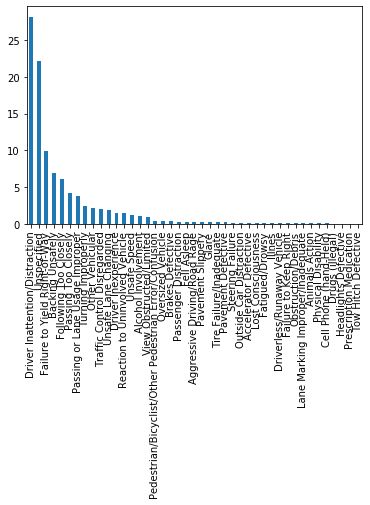

In [0]:
reason_counts1.plot.bar()

### We can plot using matplotlib to explore the data, looking for information and patterns.



NameError: ignored

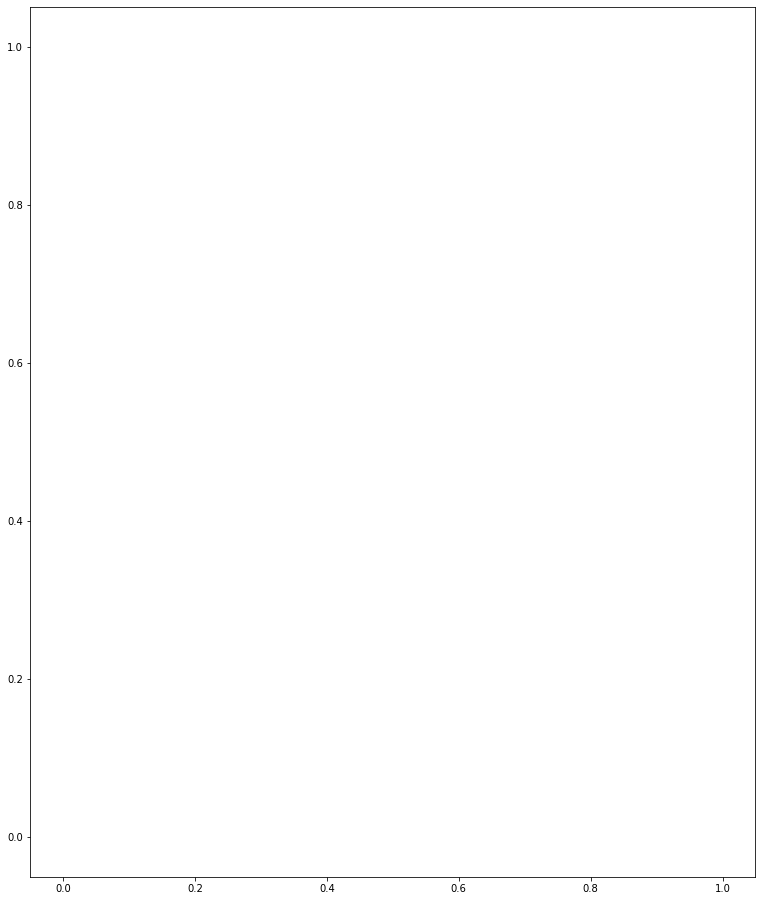

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots(figsize=(13,16))
ax.margins(0.05)
ax.plot(mv_data['QUEENS'],
       mv_data['number_of_pedestrians_injured'],
         marker='o',
       linestyle='',
       alpha=0.5)
plt.show()

### within this plot we see driver inexperience had episdoes of 1,2, and 3 numbers of pedestrians injured.

### Look at data for contributing factor vehicle1  and number of pedestrians injured in boxplot


KeyError: ignored

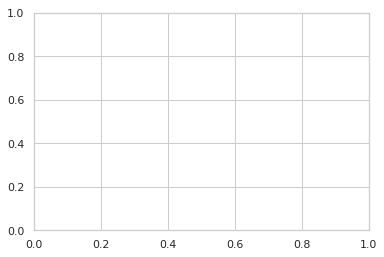

In [0]:



mv_data.boxplot(mv_data['vehicle_type_code1'].value_counts(), by='number_of_motorist_killed')

### Look at this same information with seaborn data visualization tool


ValueError: ignored

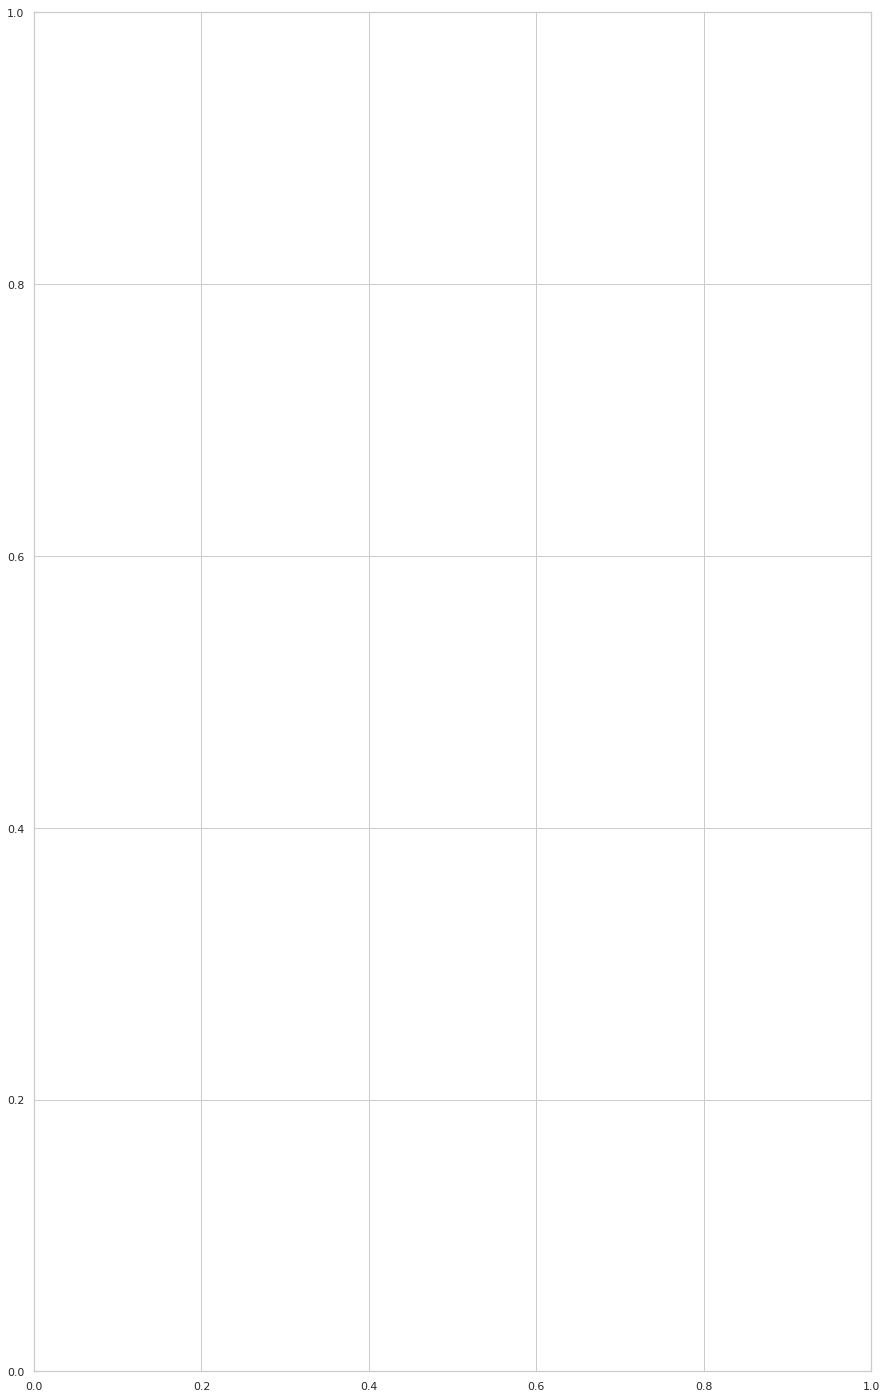

In [0]:
import seaborn as sns
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 25))
sns.scatterplot(x="CONTRIBUTING_FACTOR_VEHICLE1", y="VEHICLE_TYPE_CODE_1", 
               hue="number_pedestrians_injured", linewidth=0, data=mv_data, ax=ax)

#### So, it looks like for this particular item, crashes with driver inexperience, most vehicles did not have pedestrian injuries. Livery vehicles had 1 pedestrian injury and "motor" (what is motor compared to motor vehicle, I'm not sure) had 1 pedestrian injury. 